In [21]:
import scipy.integrate
import numpy as np
import matplotlib.pyplot as plt

In [22]:
def SEIR(y, t, beta, gamma, lamb, mu, alpha):
  S,E,I,R = y

  dsdt = lamb - mu*S- beta*I*S/N0
  dedt = beta*I*S/N - (mu+alpha)*E
  didt = alpha*E - (gamma + mu)*I
  drdt = gamma*I -mu*R

  return ([dsdt, dedt, didt, drdt])

In [23]:
N = 300000 #Poblacion total
inic = 20 #Poblacion infectada inicial
T= 365 #Ciclos

N0, S0, E0, I0, R0, beta, gamma, lamb, mu, alpha = N, N-inic, 0, inic, 0, 0.4, 1/14, 0, 0, 1/5

t= np.linspace(0,T, T*24)

solution = scipy.integrate.odeint(SEIR,[S0, E0, I0, R0], t, args=(beta, gamma, lamb, mu, alpha))
solution = np.array(solution)

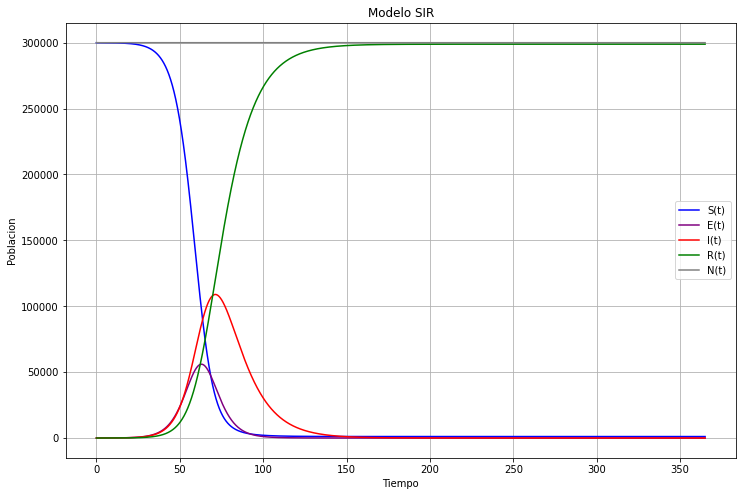

In [24]:
plt.figure(figsize=[12,8])
plt.plot(t, solution[:,0], label="S(t)", color="blue", linestyle="-")
plt.plot(t, solution[:,1], label="E(t)", color="purple", linestyle="-")
plt.plot(t, solution[:,2], label="I(t)", color="red", linestyle="-")
plt.plot(t, solution[:,3], label="R(t)", color="green", linestyle="-")
plt.plot(t, solution[:,0]+solution[:,1]+solution[:,2]+solution[:,3], label="N(t)", color="gray", linestyle="-")
plt.grid()
plt.legend()
plt.ylabel("Poblacion")
plt.xlabel("Tiempo")
plt.title("Modelo SIR")
plt.show()